In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# Import csv file
df = pd.read_csv('Resources/myopia.csv')
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
# Dropping Myopic
new_df = df.drop(columns=['MYOPIC'])
new_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [6]:
# Normalize the data to ensure that columns with high values do not have a greater impact on the outcome compared to columns with low values.
_scaler = StandardScaler()
_data_scaled = _scaler.fit_transform(new_df)

print(_data_scaled)

[[-4.20219106e-01 -1.36391690e+00 -8.92861464e-01 ...  4.98303926e-01
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01 -3.08612235e-01 -1.71839800e-01 ... -8.75087555e-01
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01  6.04386289e-01 -9.97682023e-03 ... -7.50233784e-01
  -1.01302987e+00 -9.96768974e-01]
 ...
 [-4.20219106e-01  1.65169621e+00  6.52187361e-01 ... -1.37450264e+00
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01 -2.17472219e-01 -8.48716244e-01 ... -1.88391815e-01
  -1.01302987e+00 -9.96768974e-01]
 [-4.20219106e-01  1.58339808e-03 -3.48415042e-01 ... -7.50233784e-01
   9.87137728e-01  1.00324150e+00]]


In [7]:
# PCA model
_pca = PCA(n_components=.9)

# Fit the model
new_pca = _pca.fit_transform(_data_scaled)
new_pca

array([[ 5.35502713e-01,  1.14500427e+00, -1.38501894e+00, ...,
        -1.92299652e+00,  2.67528503e-02,  1.78143856e-01],
       [-6.24705593e-01, -1.57578643e+00, -7.94253057e-01, ...,
         2.85332291e-01,  6.89682613e-01, -5.57030831e-01],
       [-9.33479366e-01, -7.17076224e-01,  8.20149929e-01, ...,
        -3.08170124e-02, -4.31499076e-01,  1.33358217e-02],
       ...,
       [-8.90082017e-01, -2.30800520e+00,  2.68101833e-01, ...,
        -4.89876908e-01,  1.82269069e+00,  8.17765449e-02],
       [-1.12399979e+00,  4.51889784e-01,  1.65865634e-03, ...,
         2.39685015e-01, -1.59282241e+00, -1.01458084e+00],
       [-6.91533913e-01, -7.37046188e-01, -1.05290000e+00, ...,
        -2.73804495e-01,  9.46160724e-01,  4.95797353e-01]])

In [ ]:
# t-SNE model
_tsne = TSNE(learning_rate=35)

# Dimension reduction
_features = _tsne.fit_transform(new_pca)

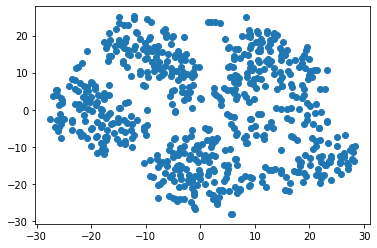

In [12]:
# Plot the results 

_x_plt = _features[:,0]
_y_plt = _features[:,1]

plt.scatter(_x_plt, _y_plt)
plt.show()

In [13]:
# Determine the optimal number of clusters using the elbow curve method

inertia = []
k = list(range(1, 10))

# Get the inertia for k values
for i in k:
    _km = KMeans(n_clusters=i, random_state=0)
    _km.fit(new_pca)
    inertia.append(_km.inertia_)

_elbowC_data = {"k": k, "inertia": inertia}
_elbow_df = pd.DataFrame(_elbowC_data)
_elbow_df

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589
5,6,5149.524688
6,7,4925.071941
7,8,4756.274760
8,9,4596.931418


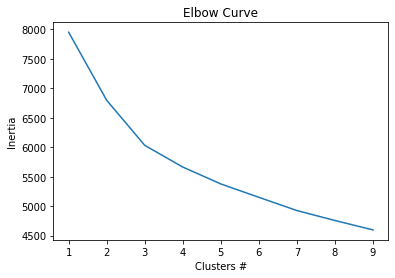

In [16]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(_elbow_df['k'], _elbow_df['inertia'])

plt.title('Elbow Curve')
plt.xlabel('Clusters #')
plt.ylabel('Inertia')

plt.show()

In [19]:
# Fit the model clusters to the model and add to df on a 'class' column
_model = KMeans(n_clusters=5, random_state=0)
_model.fit(_features)
_predict = _model.predict(_features)

new_df['class'] = _model.labels_
new_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,0
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,3
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,4
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,3


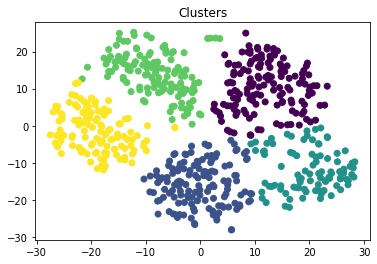

In [21]:
# Plot clusters
plt.scatter(x=_x_plt, y= _y_plt, c=new_df['class'])

plt.title('Clusters')
plt.show()

The cluster chart shows that there are five categories into which the patients can be grouped.